In [30]:
import scanpy as sc
import pandas as pd
import seaborn as sns

In [31]:
adata_orig=sc.read_csv('/Users/vikash/Documents/GeneRegulatory/Data/counts_filtered_cells.csv')

adata_orig.shape
## drop some of the rows.
#

(5245, 3560)

In [32]:
pheno_data=pd.read_csv('/Users/vikash/Documents/GeneRegulatory/Data/pheno_filtered_cells.csv')
pheno_data.set_index('sample_id',inplace=True)
pheno_data

,Unnamed: 0,orig.ident,nCount_RNA,nFeature_RNA,sequencing_run,plate_in_sequencing_run,plate_id,plate_mutant_number,plate_id_unique,well_name_R,...,nCount_log10,Prediction(Spearman),r(Spearman),Prediction(Pearsons),r(Pearsons),Prediction(Spearman)_Kasia,r(Spearman)_Kasia,Prediction(Pearson)_Kasia,r(Pearson)_Kasia,seurat_clusters_plotting
sample_id,,,,,,,,,,,,,,,,,,,,,
SC22530_1_100,SC22530_1_100,SC22530,315808,1393,22530_1,1,GCSKO-17,1,GCSKO-17_plate_1,D7,...,5.499423,14,0.202983,14,0.243651,18,0.259632,18,0.275068,1
SC22530_1_101,SC22530_1_101,SC22530,379703,1166,22530_1,1,GCSKO-17,1,GCSKO-17_plate_1,E7,...,5.579444,6,0.244107,6,0.170054,1,0.264999,1,0.288079,18
SC22530_1_103,SC22530_1_103,SC22530,245561,1927,22530_1,1,GCSKO-17,1,GCSKO-17_plate_1,G7,...,5.390159,14,0.064702,14,0.212481,30,0.042602,1,0.035753,2
SC22530_1_104,SC22530_1_104,SC22530,286028,896,22530_1,1,GCSKO-17,1,GCSKO-17_plate_1,H7,...,5.456409,16,0.290018,14,0.336618,2,0.137930,2,0.111030,2
SC22530_1_106,SC22530_1_106,SC22530,149943,1512,22530_1,3,GCSKO-2,1,GCSKO-2_plate_1,B7,...,5.175926,10,0.191558,10,0.181100,4,0.161516,4,0.153759,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC26932_6_95,SC26932_6_95,SC26932,153022,2567,26932_6,2,GCSKO-27,1,GCSKO-27_plate_1,D11,...,5.184754,22,0.167476,18,0.264610,24,0.444739,24,0.509826,0
SC26932_6_97,SC26932_6_97,SC26932,63845,860,26932_6,1,WT-820_3_5,1,WT-820_3_5_plate_1,E1,...,4.805127,18,0.504855,18,0.495713,12,0.166450,12,0.150665,7
SC26932_6_98,SC26932_6_98,SC26932,277624,2190,26932_6,1,WT-820_3_5,1,WT-820_3_5_plate_1,E2,...,5.443457,10,0.020489,10,0.046504,1,0.082194,1,0.088828,2


In [33]:
pheno_data.shape

(3560, 113)

In [34]:
pheno_data.columns

Index(['Unnamed: 0', 'orig.ident', 'nCount_RNA', 'nFeature_RNA',
       'sequencing_run', 'plate_in_sequencing_run', 'plate_id',
       'plate_mutant_number', 'plate_id_unique', 'well_name_R',
       ...
       'nCount_log10', 'Prediction(Spearman)', 'r(Spearman)',
       'Prediction(Pearsons)', 'r(Pearsons)', 'Prediction(Spearman)_Kasia',
       'r(Spearman)_Kasia', 'Prediction(Pearson)_Kasia', 'r(Pearson)_Kasia',
       'seurat_clusters_plotting'],
      dtype='object', length=113)

In [35]:
pheno_data['plate_id'].unique()

array(['GCSKO-17', 'GCSKO-2', 'GCSKO-20', 'GCSKO-19', 'GCSKO-10',
       'GCSKO-13', 'GCSKO-10_820', 'GCSKO-3', 'GCSKO-oom', 'WT-820',
       'GCSKO-29', 'GCSKO-glasgow', 'WT-820_3_5', 'GCSKO-28', 'GCSKO-27'],
      dtype=object)

In [36]:
pheno_data['identity_updated'].unique()

array(['GCSKO-17', 'GCSKO-2', 'WT', 'GCSKO-10', 'GCSKO-19', 'GCSKO-20',
       'GCSKO-13', 'GCSKO-10_820', 'GCSKO-3', 'GCSKO-oom', 'GCSKO-29',
       'GCSKO-21', 'GCSKO-28', 'GCSKO-27'], dtype=object)

In [37]:
pheno_data['identity_gene_updated'].unique()

array(['PBANKA_1418100', 'PBANKA_0102400', 'WT', 'PBANKA_0413400',
       'PBANKA_0716500', 'PBANKA_1435200', 'PBANKA_0902300',
       'PBANKA_0413400_820', 'PBANKA_0828000', 'PBANKA_1302700',
       'PBANKA_1447900', 'PBANKA_1454800', 'PBANKA_1144800',
       'PBANKA_0713500'], dtype=object)

In [38]:

adata=adata_orig.T.copy()


adata.obs=pd.concat([adata.obs,pheno_data],axis=1,sort=False)

# remove some of the plates 

adata.obs['identity_gene_updated'].unique()

adata.obs[adata.obs['identity_gene_updated' ].isnull()]

## make subset of adata

adata = adata[~adata.obs['identity_gene_updated' ].isnull(),:].copy()
print(adata.shape)
print(adata.obs['identity_gene_updated'].unique())
### filter before clustering as suggested by Oliver 



# 121 cells where identity_gene_updated = PBANKA_0413400 (edited) 
# tmp=adata[(adata.obs['identity_gene_updated' ]=='PBANKA_0413400')]
# print(tmp.shape)
adata = adata[~(adata.obs['identity_gene_updated' ]=='PBANKA_0413400'),:].copy()

print(adata.shape)
# (However, keep 305 cells were the value is PBANKA_0413400_820)

# Also omit 257 cells where identity_gene_updated = PBANKA_0713500
# tmp=adata[(adata.obs['identity_gene_updated' ]=='PBANKA_0713500')]
# print(tmp.shape)
adata = adata[~(adata.obs['identity_gene_updated' ]=='PBANKA_0713500'),:].copy()

print(adata.shape)





(3560, 5245)
['PBANKA_1418100' 'PBANKA_0102400' 'WT' 'PBANKA_0413400' 'PBANKA_0716500'
 'PBANKA_1435200' 'PBANKA_0902300' 'PBANKA_0413400_820' 'PBANKA_0828000'
 'PBANKA_1302700' 'PBANKA_1447900' 'PBANKA_1454800' 'PBANKA_1144800'
 'PBANKA_0713500']
(3400, 5245)
(3139, 5245)


(3139, 5245)

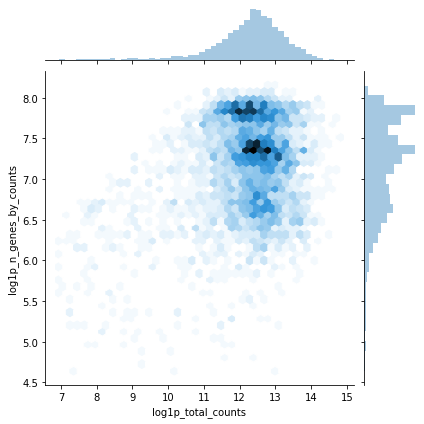

In [39]:
###### quality control

## map phenotype
sc.pp.calculate_qc_metrics(adata, inplace=True)
fig=sns.jointplot(
        "log1p_total_counts", "log1p_n_genes_by_counts",
        data=adata.obs, kind="hex"
    )
fig.savefig('/Users/vikash/Documents/GeneRegulatory/Figures/QC_plot.pdf')

# ### filter 
# sc.pp.filter_cells(adata, min_genes=330)

# sc.pp.filter_cells(adata, min_counts=36315)

### this is to remove droplets
#sc.pp.filter_cells(adata, max_genes=3000)




adata.shape

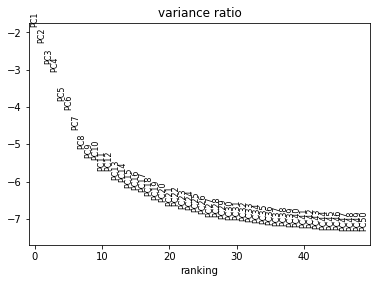

In [40]:

sc.pp.normalize_total(adata,target_sum=1e6)
sc.pp.log1p(adata)
sc.tl.pca(adata)

sc.pl.pca_variance_ratio(adata, n_pcs=50,log=True)


... storing 'orig.ident' as categorical
... storing 'sequencing_run' as categorical
... storing 'plate_id' as categorical
... storing 'plate_id_unique' as categorical
... storing 'well_name_R' as categorical
... storing 'well_name_2' as categorical
... storing 'well_letter' as categorical
... storing 'nextera_tag_sequence' as categorical
... storing 'nextera_tag_kit' as categorical
... storing 'nextera_tag_id_1' as categorical
... storing 'nextera_tag_id_2' as categorical
... storing 'nextera_tag_S_sequence' as categorical
... storing 'nextera_tag_N_sequence' as categorical
... storing 'genotype' as categorical
... storing 'identity' as categorical
... storing 'sub_identity' as categorical
... storing 'idenity_gene' as categorical
... storing 'identity_updated' as categorical
... storing 'identity_gene_updated' as categorical
... storing 'genetic_background' as categorical
... storing 'species' as categorical
... storing 'fluoresence_sorted_on' as categorical
... storing 'sequencing_na

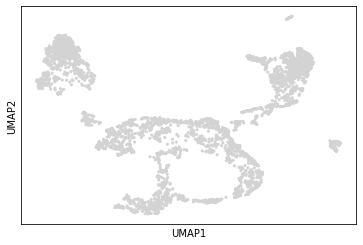

In [41]:

sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)
sc.tl.umap(adata,min_dist=0.35)
sc.settings.figdir = '/Users/vikash/Documents/GeneRegulatory/Figures/' 
pdf='clustering_by_all_cells.pdf'
sc.pl.umap(adata,show=True,save=pdf)


In [42]:
## add menu to see 8 cells
cells=["SC25027_8_33","SC25027_8_75",  "SC25027_8_157", "SC25027_8_293", "SC25027_8_325", "SC25027_8_124", "SC25027_8_171",
"SC25027_8_281"]

adata.obs['selected_cells']='cells'

for cell in cells:
    adata.obs.loc[cell,'selected_cells']=cell
adata.obs['selected_cells']=adata.obs['selected_cells'].astype('category')


In [43]:
adata.var

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
PBANKA_0000101,60,0.115642,0.109430,98.088563,363.0,5.897154
PBANKA_0000201,0,0.000000,0.000000,100.000000,0.0,0.000000
PBANKA_0000301,240,5.274291,1.836460,92.354253,16556.0,9.714564
PBANKA_0000401,197,0.206117,0.187406,93.724116,647.0,6.473891
PBANKA_0000600,6,0.007009,0.006984,99.808856,22.0,3.135494
...,...,...,...,...,...,...
PBANKA_MIT03300:rRNA,0,0.000000,0.000000,100.000000,0.0,0.000000
PBANKA_MIT03400:rRNA,0,0.000000,0.000000,100.000000,0.0,0.000000
PBANKA_MIT03500:rRNA,3138,4438.072266,8.398201,0.031857,13931109.0,16.449635
PBANKA_MIT03600:rRNA,2847,95.650841,4.571105,9.302326,300248.0,12.612368


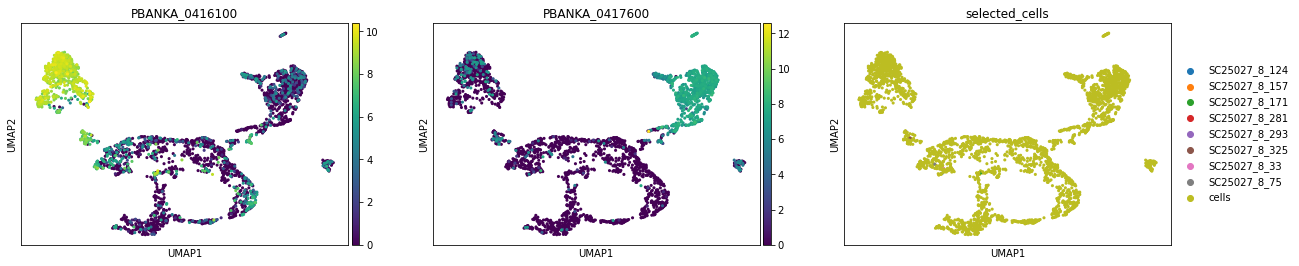

In [46]:
male_gene='PBANKA_0214000'
female_gene='PBANKA_0417600'
pdf='male_female_after_filtering.pdf'
sc.pl.umap(adata, color=[ 'PBANKA_0416100', 'PBANKA_0417600','selected_cells'],save=pdf)



In [49]:
### cellxgene data building
adata_cellxgene=adata.copy()
drop_cols=set(adata_cellxgene.obs.columns)-set(['sub_identity','identity_gene_updated','genetic_background','n_genes', 'n_counts','selected_cells','n_genes_by_counts','total_counts','log1p_n_genes_by_counts','log1p_total_counts'])
adata_cellxgene.obs=adata_cellxgene.obs.drop(columns=drop_cols)
adata_cellxgene.obs=adata_cellxgene.obs.rename(columns={'identity_gene_updated':'Genotype'})
results_file = '/Users/vikash/Documents/GeneRegulatory/Files/GCSKO.h5ad'
adata_cellxgene.write(results_file)


In [51]:
adata_cellxgene.obs.columns

Index(['sub_identity', 'Genotype', 'genetic_background', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts',
       'selected_cells'],
      dtype='object')